In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Lets do some exploratory data analysis**


In [3]:
data='./data_kaggle_baby_names/babyNamesUSYOB-mostpopular.csv'
df = pd.read_csv(data, index_col=0)
df
#df.info()

,YearOfBirth,Name,Sex,Number
index,,,,
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320


## **Print the name that was most popular in any year**

In [46]:
a=df.loc[df['Number'].idxmax()] 
print(a['Name'],a['YearOfBirth'])

Linda 1947


## **Print the female baby name that was most popular in any year**

In [5]:
b=df.loc[df['Sex']=='F']
s=b.loc[b['Number'].idxmax()]
print(s['Name'],s['YearOfBirth'])

Linda 1947


## **Print the male baby name that was most popular in any year**

In [47]:
b=df.loc[df['Sex']=='M']
s=b.loc[b['Number'].idxmax()]
print(s['Name'],s['YearOfBirth'])

James 1947


## **This plot shows the no.of babies born with unique names in a 5 year interval period**

28 28 28 [364, 421, 488, 537, 564, 678, 1259, 1405, 1461, 1424, 1378, 1388, 1524, 1678, 1847, 2004, 2045, 2147, 2292, 2402, 2516, 2869, 3197, 3463, 3877, 4193, 4098, 3436]


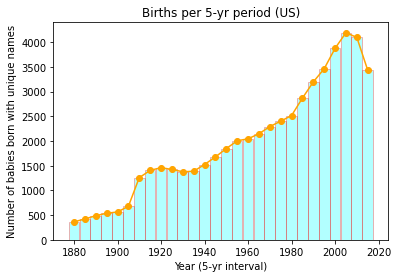

In [48]:
int_range=5
start_yr=[]
end_yr=[]
num=[]
for i in range(df['YearOfBirth'].min(),df['YearOfBirth'].max()+1,int_range):
    s=df[df['YearOfBirth'].between(i,i+int_range+1,inclusive=True)]
    start_yr.append(i)
    end_yr.append(i+int_range)
    s=s.Name.unique()
    num.append(s.shape[0])
    
    
print(len(start_yr),len(num),len(end_yr),num)
plt.bar(start_yr,num,width=4.9,edgecolor='red',color='cyan',alpha=0.3)
plt.plot(start_yr,num,'-o',color='orange')
plt.xlabel('Year ({}-yr interval)'.format(int_range))
plt.ylabel('Number of babies born with unique names')
plt.title('Births per {}-yr period (US)'.format(int_range))
plt.show()
#There is a dip in the number of births after 1920-1925 which then starts to increase after 1945
#This was the period between the two world wars.

## **Print the no.of unique male and female baby names along with no.of common names**

In [49]:
b=df.loc[df['Sex']=='F' ]
b=b.Name.unique()
print('No.of unique names for female babies:',len(b))

x=df.loc[df['Sex']=='M']
x=x.Name.unique()
print('No.of unique names for male babies:',len(x))

print('No.of names used in common for both male and female:',len(np.intersect1d(b,x)))

No.of unique names for female babies: 4598
No.of unique names for male babies: 2805
No.of names used in common for both male and female: 486


## **Most popular and least popular female baby names**

In [9]:
x=df.loc[df['Sex']=='F']    
k=x.groupby('Name')['Number'].sum().sort_values(ascending=False)
k.columns=['Name','Number']
k=k.reset_index()
print('Most popular female name:',k['Name'][0])
print('Least popular female name:',k['Name'][len(k['Name'])-1])
k

Most popular female name: Mary
Least popular female name: Kamiah


,Name,Number
0,Mary,4118058
1,Elizabeth,1610948
2,Patricia,1570243
3,Jennifer,1463600
4,Linda,1449714
5,Barbara,1433339
6,Margaret,1242141
7,Susan,1120810
8,Dorothy,1106106
9,Sarah,1065265


## **Most popular and least popular male baby names**

In [50]:
x=df.loc[df['Sex']=='M']    
k=x.groupby('Name')['Number'].sum().sort_values(ascending=False)
k.columns=['Name','Number']
k=k.reset_index()
print('Most popular male name:',k['Name'][0])
print('Least popular male name:',k['Name'][len(k['Name'])-1])
k

Most popular male name: James
Least popular male name: Antoni


,Name,Number
0,James,5120990
1,John,5095674
2,Robert,4803068
3,Michael,4323928
4,William,4071645
5,David,3589754
6,Joseph,2581785
7,Richard,2558165
8,Charles,2371621
9,Thomas,2290364


## **Variation of the number of births  per year and also the sex ratio**

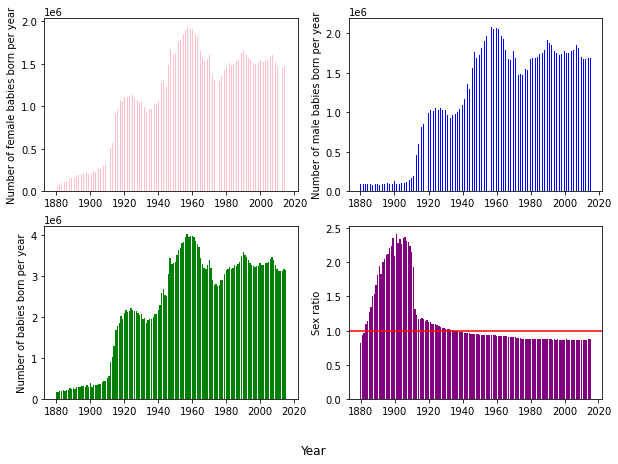

In [51]:
x=df.loc[df['Sex']=='F']   
y=df.loc[df['Sex']=='M']  
total_f=x.groupby('YearOfBirth')['Number'].sum()
total_m=y.groupby('YearOfBirth')['Number'].sum()
year=df['YearOfBirth'].unique()
fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0, 0].bar(year, total_f, width=0.4,color='pink')
ax[0, 1].bar(year, total_m,width=0.4 ,color='blue')
ax[1, 0].bar(year, total_f+total_m, color='green')
ax[1, 1].bar(year, total_f/total_m, color='purple')



ax[0,0].set_ylabel('Number of female babies born per year')
ax[0,1].set_ylabel('Number of male babies born per year')
ax[1,0].set_ylabel('Number of babies born per year')
ax[1,1].set_ylabel('Sex ratio') #number of female babies born/ number of male babies born
ax[1,1].axhline(y=1.0,color='red')
fig.supxlabel('Year')

plt.show()

## **Unique baby names used per year**
### _With time, people came up with more unique names for their babies_

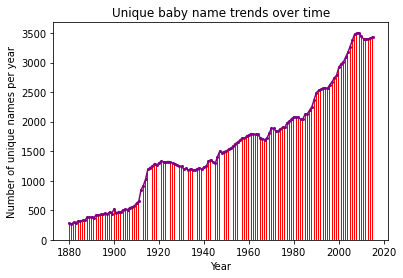

In [53]:
year=df['YearOfBirth'].unique()
f=df.groupby('YearOfBirth')['Name'].unique()
f=np.array(f)
array=[]
for i in range(0,len(f)):
    array.append(len(f[i]))
   
plt.bar(year,array,width=0.4,color='red')
plt.plot(year,array,'-o',color='purple',ms=2)
plt.xlabel('Year')
plt.ylabel('Number of unique names per year')
plt.title('Unique baby name trends over time')
plt.show()

## **Popularity variation through the years for top four popular female baby names**

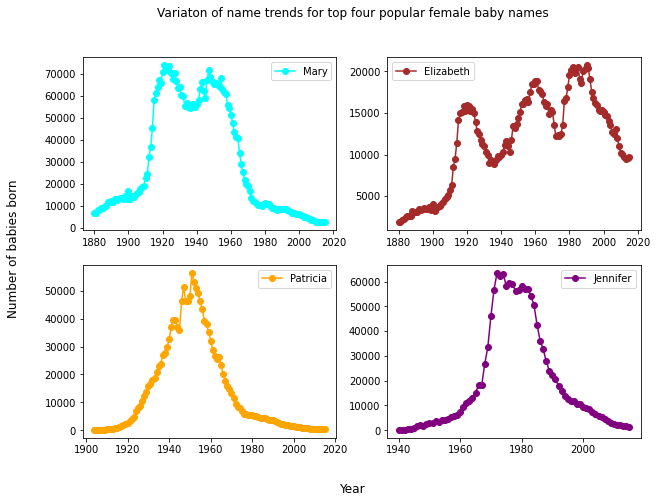

In [13]:
x=df.loc[df['Sex']=='F']  
m=x.groupby(['Name','YearOfBirth'])['Number'].sum()
m.columns=['Name','Year','Number']
m=m.reset_index() #converting series output to dataframe
inp=['Mary','Elizabeth','Patricia','Jennifer']
year_birth=[]
number_born=[]
for i in inp:
    year_birth.append(m[m['Name']==i]['YearOfBirth'])
    number_born.append(m[m['Name']==i]['Number'])

fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0, 0].plot(year_birth[0], number_born[0], '-o',color='cyan',label=inp[0])
ax[0, 1].plot(year_birth[1], number_born[1],'-o' ,color='brown',label=inp[1])
ax[1, 0].plot(year_birth[2], number_born[2], '-o',color='orange',label=inp[2])
ax[1, 1].plot(year_birth[3], number_born[3],'-o', color='purple',label=inp[3])
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
fig.supxlabel('Year')
fig.supylabel('Number of babies born')
plt.suptitle('Variaton of name trends for top four popular female baby names')
plt.show()

## **Popularity variation through the years for top four popular male baby names**

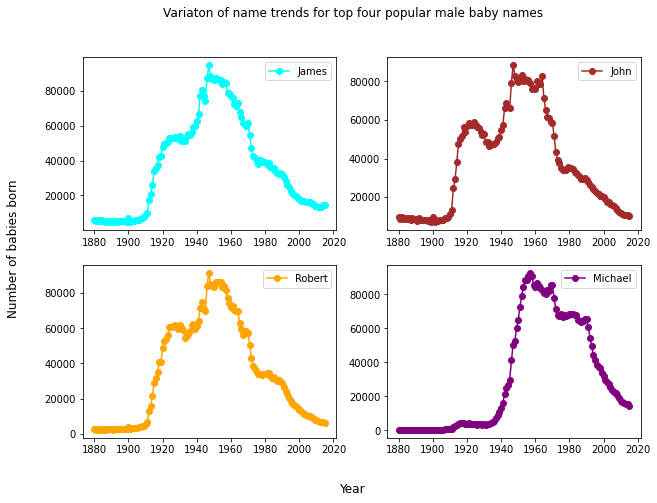

In [14]:
x=df.loc[df['Sex']=='M']  
m=x.groupby(['Name','YearOfBirth'])['Number'].sum()
m.columns=['Name','Year','Number']
m=m.reset_index() #converting series output to dataframe
inp=['James','John','Robert','Michael']
year_birth=[]
number_born=[]
for i in inp:
    year_birth.append(m[m['Name']==i]['YearOfBirth'])
    number_born.append(m[m['Name']==i]['Number'])


fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0, 0].plot(year_birth[0], number_born[0], '-o',color='cyan',label=inp[0])
ax[0, 1].plot(year_birth[1], number_born[1],'-o' ,color='brown',label=inp[1])
ax[1, 0].plot(year_birth[2], number_born[2], '-o',color='orange',label=inp[2])
ax[1, 1].plot(year_birth[3], number_born[3],'-o', color='purple',label=inp[3])
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
fig.supxlabel('Year')
fig.supylabel('Number of babies born')
plt.suptitle('Variaton of name trends for top four popular male baby names')
plt.show()

## **Most preferred first initial for boys**

In [15]:
from statistics import mode
x=df.loc[df['Sex']=='M'] 
alphabets=[]
for item in x['Name'].unique():
    alphabets.append(item[:1])
alphabets=np.array(alphabets)
print('The most preferred letter to name boys:',mode(alphabets))

The most preferred letter to name boys: J


## **Most preferred first initial for girls**

In [16]:
from statistics import mode
x=df.loc[df['Sex']=='F'] 
alphabets=[]
for item in x['Name'].unique():
    alphabets.append(item[:1])
alphabets=np.array(alphabets)
print('The most preferred letter to name girls:',mode(alphabets))

The most preferred letter to name girls: A


## **Generating wordcloud from the array of names**

['Mary' 'Anna' 'Emma' ... 'Niklaus' 'Osiris' 'Steele'] 224261


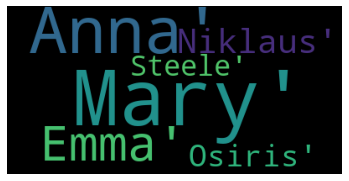

In [17]:

from wordcloud import WordCloud
f=df['Name'].values
print(f,len(f))
wordcloud = WordCloud().generate(str(f))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Number of unique names starting with a distinct English alphabet**

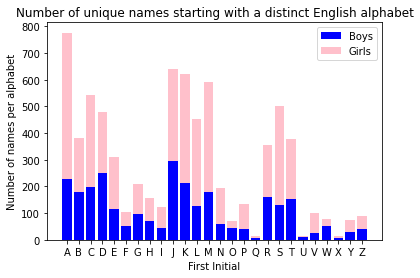

In [54]:
import collections
#for males
x=df.loc[df['Sex']=='M'] 
alphabets_m=[] 
for item in x['Name'].unique(): 
    alphabets_m.append(item[:1]) 
    
alphabets_m=np.array(alphabets_m)
value_m=[]
name_m=[] 
elements_count = collections.Counter(alphabets_m) 
for key, value in elements_count.items(): 
    name_m.append(str(f"{key}")) 
    value_m.append(float(f"{value}"))
    
value_m=np.array(value_m) 
name_m=np.array(name_m)

#for females
y=df.loc[df['Sex']=='F'] 
alphabets_f=[] 
for item in y['Name'].unique(): 
    alphabets_f.append(item[:1])

alphabets_f=np.array(alphabets_f)
value_f=[]
name_f=[] 
elements_count = collections.Counter(alphabets_f) 
for key, value in elements_count.items(): 
    name_f.append(str(f"{key}")) 
    value_f.append(float(f"{value}"))
    
value_f=np.array(value_f)
name_f=np.array(name_f)

sort_m = np.argsort(name_m)
sorted_name_m=name_m[sort_m]
sorted_value_m=value_m[sort_m]


sort_f = np.argsort(name_f)
sorted_name_f=name_f[sort_f]
sorted_value_f=value_f[sort_f]


plt.bar(sorted_name_m, sorted_value_m, color='blue')
plt.bar(sorted_name_f, sorted_value_f, bottom=sorted_value_m, color='pink')
plt.legend(['Boys','Girls'])
plt.ylabel('Number of names per alphabet')
plt.xlabel('First Initial')
plt.title('Number of unique names starting with a distinct English alphabet')
plt.show()